# IMPORT LIBRARIES

In [2]:
#%pip install tabulate

import numpy as np       
import pandas as pd      
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
import string
import nltk
%matplotlib inline
from tabulate import tabulate
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from nltk.stem import SnowballStemmer
from collections import Counter 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# DOWNLOAD STOPWORDS AND TOKENIZER

In [3]:
nltk.download('stopwords')
nltk.download('punkt')   

[nltk_data] Downloading package stopwords to C:\Users\Republic Of
[nltk_data]     Gamers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Republic Of
[nltk_data]     Gamers\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv("C:\\Users\\Republic Of Gamers\\OneDrive - Asia Pacific University\\TXSA Spam Dataset\\SPAM text message 20170820 - Data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# TABULATE THE DATASET

In [5]:
styled_df = df.head()
data = styled_df.values.tolist()
headers = list(styled_df.columns)
table = tabulate(data, headers=headers, tablefmt="grid")
print(table)

+------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Category   | Message                                                                                                                                                     |
+============+=============================================================================================================================================================+
| ham        | Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                             |
+------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+
| ham        | Ok lar... Joking wif u oni...                                                                                           

# DATASET INFORMATION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


##### DATASET ROWS AND COLUMNS

In [7]:
df.shape

(5572, 2)

##### Check for Missing Values

In [8]:
#checking missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

##### Handle for Duplication Values

In [9]:
#check duplicate values
df.duplicated().sum()

415

##### Remove Duplicated Value

In [10]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

# PREPROCESSING

##### Convert the target variable

In [11]:
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])

C:\Users\Republic Of Gamers\AppData\Local\Temp\ipykernel_12212\253710615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = encoder.fit_transform(df['Category'])


##### Dataset Information after Converting Target Variable

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   int32 
 1   Message   5157 non-null   object
dtypes: int32(1), object(1)
memory usage: 100.7+ KB


##### Stemming

In [13]:
stemmer = SnowballStemmer("english")
def preprocess(text):
    text = text.lower()
    text = re.findall(r'\b\w+\b', text)
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

##### Create new column for pre-processed message

In [14]:
preprocessedMsg = df['Message'].apply(preprocess)
preprocessed_df = pd.DataFrame({'preprocessedMessage': preprocessedMsg})
preprocessed_df = pd.concat([df, preprocessed_df], axis=1)

##### Display the values in tabulate form

In [15]:
print(tabulate(preprocessed_df.head(), headers='keys', tablefmt='grid'))

+----+------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------+
|    |   Category | Message                                                                                                                                                     | preprocessedMessage                                                                                                                   |
+====+============+=============================================================================================================================================================+=======================================================================================================================================+
|  0 |          0 | Go until jurong point, crazy.. Availab

##### Dataset information after pre-processing

In [16]:
df = preprocessed_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Category             5157 non-null   int32 
 1   Message              5157 non-null   object
 2   preprocessedMessage  5157 non-null   object
dtypes: int32(1), object(2)
memory usage: 141.0+ KB


### Exploratory Data Analysis

In [43]:
df['numChara'] = df['preprocessedMessage'].apply(len)
df['numWords'] = df['preprocessedMessage'].apply(lambda x: len(nltk.word_tokenize(x)))
df['numSentence'] = df['preprocessedMessage'].apply(lambda x: len(nltk.sent_tokenize(x)))

##### Character numbers, Words numbers, and Sentence numbers

In [44]:
df[['numChara', 'numWords', 'numSentence']].describe()

,numChara,numWords,numSentence
count,5157.000000,5157.000000,5157.000000
mean,48.101222,9.382781,0.998837
std,37.993965,7.111551,0.034093
min,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000
50%,35.000000,7.000000,1.000000
75%,69.000000,13.000000,1.000000
max,412.000000,78.000000,1.000000


##### Summary Statistics for Legitimate Message

In [45]:
#ham
df[df['Category'] == 0][['numChara', 'numWords', 'numSentence']].describe()

,numChara,numWords,numSentence
count,4516.000000,4516.000000,4516.000000
mean,40.722764,8.160097,0.998671
std,33.357950,6.475531,0.036430
min,0.000000,0.000000,0.000000
25%,19.000000,4.000000,1.000000
50%,31.000000,6.000000,1.000000
75%,54.000000,11.000000,1.000000
max,412.000000,78.000000,1.000000


##### Summary Statistics for Spam Messages

In [47]:
#spam
df[df['Category'] == 1][['numChara', 'numWords', 'numSentence']].describe()

,numChara,numWords,numSentence
count,641.000000,641.000000,641.0
mean,100.084243,17.996880,1.0
std,26.244924,5.172039,0.0
min,5.000000,1.000000,1.0
25%,88.000000,15.000000,1.0
50%,104.000000,19.000000,1.0
75%,118.000000,21.000000,1.0
max,155.000000,32.000000,1.0


##### Distribution in Box Plot

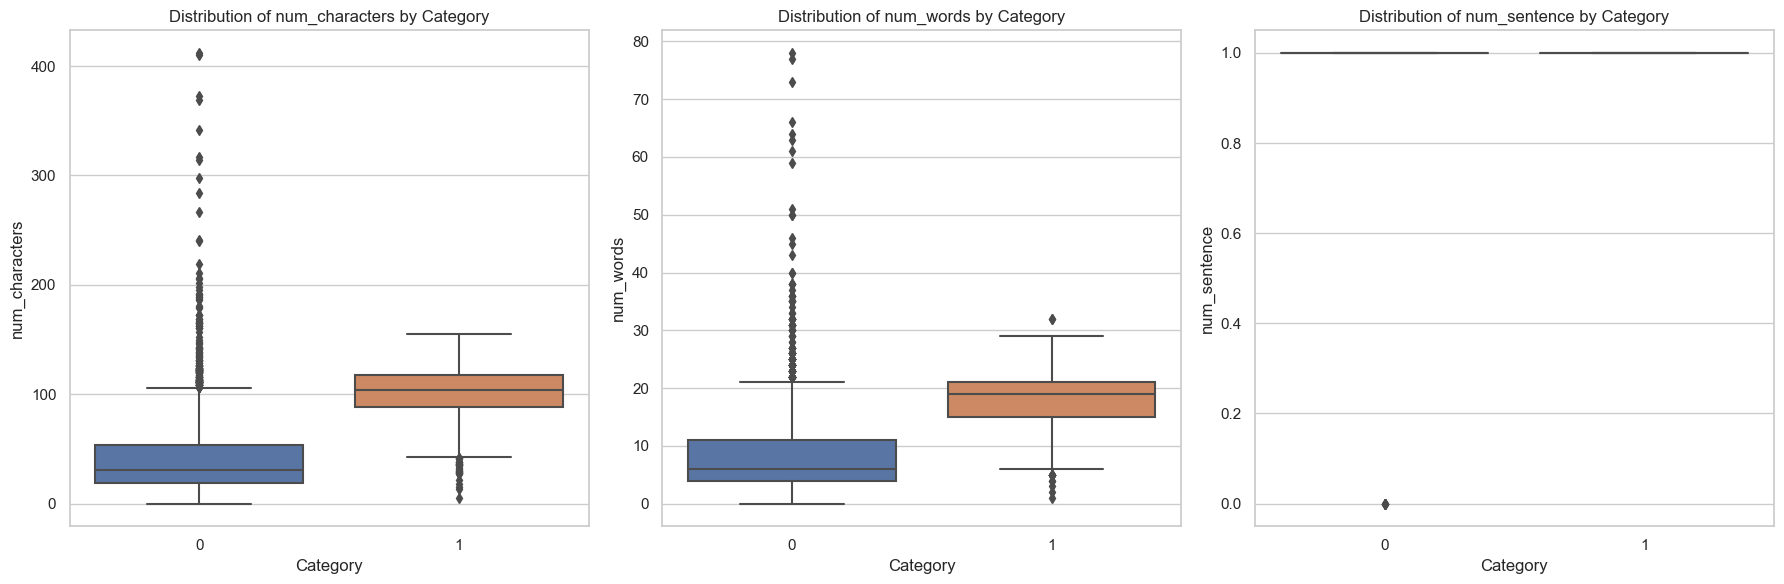

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Category', y='num_characters', data=df)
plt.title('Distribution of num_characters by Category')

plt.subplot(1, 3, 2)
sns.boxplot(x='Category', y='num_words', data=df)
plt.title('Distribution of num_words by Category')

plt.subplot(1, 3, 3)
sns.boxplot(x='Category', y='num_sentence', data=df)
plt.title('Distribution of num_sentence by Category')

plt.tight_layout()
plt.show()

##### Value Distribution of Dataset

In [24]:
values = df['Category'].value_counts()
total = values.sum()

percent0 = (values[0] /total) * 100
percent1 = (values[1]/ total) *100

print('percentage of 0 :' ,percent0)
print('percentage of 1 :' ,percent1)

percentage of 0 : 87.5702928058949
percentage of 1 : 12.429707194105099


##### Visualize the Distribution

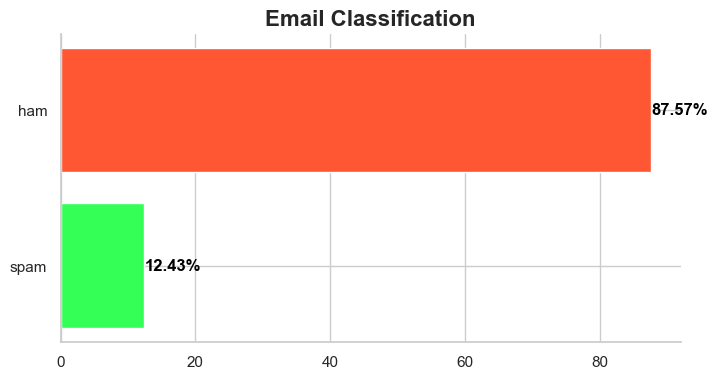

In [25]:
values = [percent0, percent1]  # Example values for 'ham' and 'spam'
categories = ['ham', 'spam']
colors = ['#FF5733', '#33FF57']

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_facecolor('white')

bars = ax.barh(categories, values, color=colors)

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', ha='left', color='black', fontweight='bold')

ax.set_title('Email Classification', fontsize=16, fontweight='bold')
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

##### Word Cloud

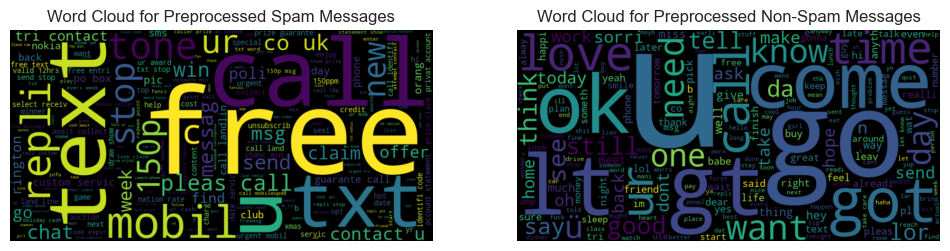

In [27]:
# Concatenate preprocessed messages for spam and non-spam
preprocessedSpam = ' '.join(df[df['Category'] == 1]['preprocessedMessage'])
preprocessedHam = ' '.join(df[df['Category'] == 0]['preprocessedMessage'])
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloudSpam = WordCloud(width=800, height=400).generate(preprocessedSpam)
plt.imshow(wordcloudSpam, interpolation='bilinear')
plt.title('Word Cloud for Preprocessed Spam Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloudHam = WordCloud(width=800, height=400).generate(preprocessedHam)
plt.imshow(wordcloudHam, interpolation='bilinear')
plt.title('Word Cloud for Preprocessed Non-Spam Messages')
plt.axis('off')

plt.show()

##### Correlation

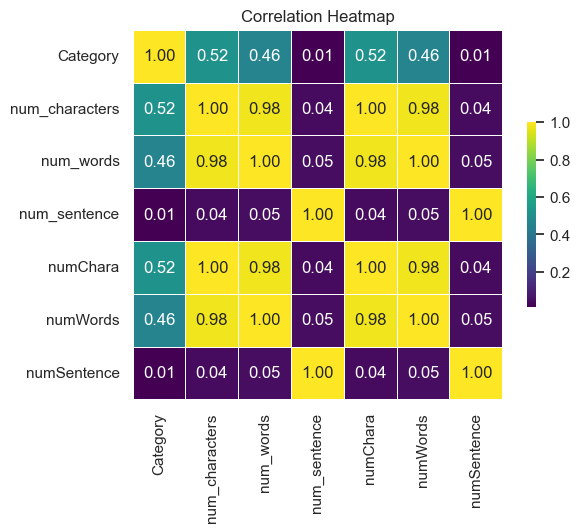

In [48]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df.drop(columns=['Message', 'preprocessedMessage'])

# Calculate correlation
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

##### Top 30 Words in Both Category

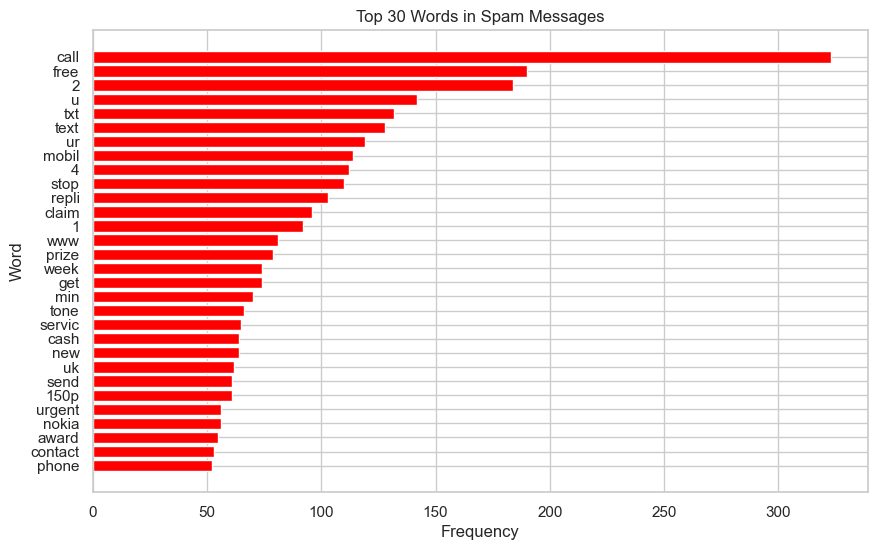

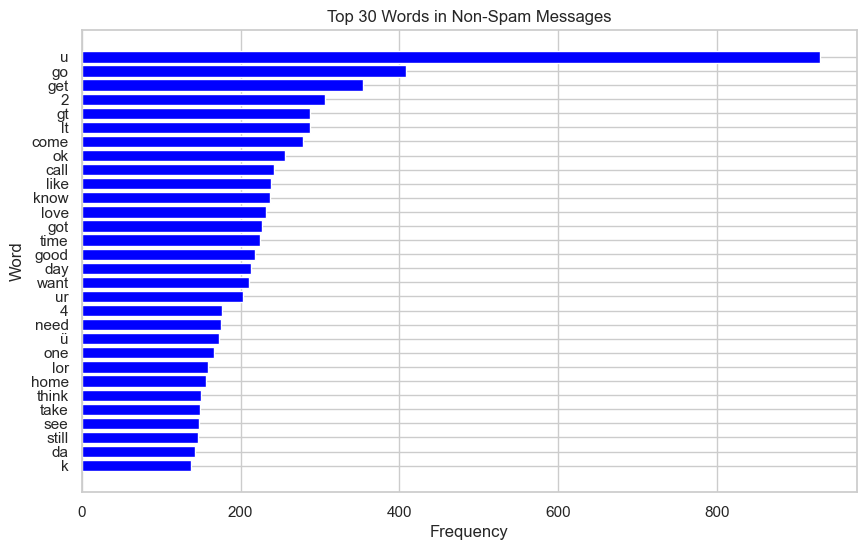

In [29]:
def topWords(text, n=30):
    words = text.split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(n)
    return top_words

topSpamWords = topWords(preprocessedSpam, n=30)
topHamWords = topWords(preprocessedHam, n=30)

topSpamWords, topSpamFreq = zip(*topSpamWords)
topHamWords, topHamFreq = zip(*topHamWords)

plt.figure(figsize=(10, 6))
plt.barh(topSpamWords, topSpamFreq, color='red')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Words in Spam Messages')
plt.gca().invert_yaxis()
plt.show()

# Plotting the top words for non-spam messages
plt.figure(figsize=(10, 6))
plt.barh(topHamWords, topHamFreq, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Words in Non-Spam Messages')
plt.gca().invert_yaxis()
plt.show()

# MODELING

##### Dependent and Independent Variable

In [30]:
x = df['preprocessedMessage']  
y = df['Category']  

##### Data Splitting

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

##### TF-IDF Vectorizer

In [32]:
vectorizer = TfidfVectorizer(max_features=3000)
xTrain_tfidf = vectorizer.fit_transform(x_train)
xTest_tfidf = vectorizer.transform(x_test)

##### Logistic Regression

In [33]:
logisticRegression = LogisticRegression()
logisticRegression.fit(xTrain_tfidf, y_train)
trainPredictionLR = logisticRegression.predict(xTrain_tfidf)
testPredictionLR = logisticRegression.predict(xTest_tfidf)

In [34]:
trainAccLR= accuracy_score(y_train, trainPredictionLR)
print("Logistic Regression Training Accuracy:", trainAccLR)

testAccLR = accuracy_score(y_test, testPredictionLR)
print("Logistic Regression Testing Accuracy:", testAccLR)

print("\nClassification Report:")
print(classification_report(y_test, testPredictionLR))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, testPredictionLR))

Logistic Regression Training Accuracy: 0.9684123025768911
Logistic Regression Testing Accuracy: 0.962532299741602

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1345
           1       0.97      0.74      0.84       203

    accuracy                           0.96      1548
   macro avg       0.96      0.87      0.91      1548
weighted avg       0.96      0.96      0.96      1548


Confusion Matrix:
[[1340    5]
 [  53  150]]


##### Random Forest

In [35]:
randomForest = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest.fit(xTrain_tfidf, y_train)
trainPredictionRF = randomForest.predict(xTrain_tfidf)
testPredictionRF = randomForest.predict(xTest_tfidf)

In [36]:
trainAccRF = accuracy_score(y_train, trainPredictionRF)
print("Random Forest Training Accuracy:", trainAccRF)

testAccRF = accuracy_score(y_test, testPredictionRF)
print("Testing Accuracy:", testAccRF)

print("\nClassification Report:")
print(classification_report(y_test, testPredictionRF))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, testPredictionRF))

Random Forest Training Accuracy: 1.0
Testing Accuracy: 0.979328165374677

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1345
           1       0.97      0.87      0.92       203

    accuracy                           0.98      1548
   macro avg       0.98      0.93      0.95      1548
weighted avg       0.98      0.98      0.98      1548


Confusion Matrix:
[[1340    5]
 [  27  176]]


##### Naive Bayes

In [37]:
naiveBaiyes = MultinomialNB()
naiveBaiyes.fit(xTrain_tfidf, y_train)
nbTrainPred = naiveBaiyes.predict(xTrain_tfidf)
nbTestPred = naiveBaiyes.predict(xTest_tfidf)

In [38]:
trainAccNB = accuracy_score(y_train, nbTrainPred)
print("Naive Bayes Training Accuracy:", trainAccNB)

accuracy = accuracy_score(y_test, nbTestPred)
print("Naive Bayes Test Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, nbTestPred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nbTestPred))

Naive Bayes Training Accuracy: 0.9814353006372957
Naive Bayes Test Accuracy: 0.9748062015503876

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1345
           1       0.99      0.81      0.89       203

    accuracy                           0.97      1548
   macro avg       0.98      0.91      0.94      1548
weighted avg       0.98      0.97      0.97      1548


Confusion Matrix:
[[1344    1]
 [  38  165]]


SVM

In [39]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(xTrain_tfidf, y_train)
svmTestPrediction = svm.predict(xTest_tfidf)
svmTrainPrediction = svm.predict(xTrain_tfidf)

In [40]:
trainAccSVM = accuracy_score(y_train, svmTrainPrediction)
print("SVM Training Accuracy:", trainAccSVM)

testAccSVM = accuracy_score(y_test, svmTestPrediction)
print("SVM Test Accuracy:", testAccSVM)

print("\nClassification Report:")
print(classification_report(y_test, svmTestPrediction))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svmTestPrediction))

SVM Training Accuracy: 0.9925187032418953
SVM Test Accuracy: 0.979328165374677

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1345
           1       0.96      0.88      0.92       203

    accuracy                           0.98      1548
   macro avg       0.97      0.94      0.95      1548
weighted avg       0.98      0.98      0.98      1548


Confusion Matrix:
[[1337    8]
 [  24  179]]
